# Question

In [3]:
# How can we balance personalization with cost-effectiveness in marketing campaigns?
# Objective: Design a cost-benefit analysis model to assess the impact of personalized marketing strategies.
# Expected Outcome: Propose a model that ensures a balance between personalization and cost management.


# Importing Packages

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, BayesianRidge

C:\Users\User\AppData\Local\Temp\ipykernel_19588\2959514644.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Getting Data

In [5]:
# Get data
campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")
customer = pd.read_csv("../Data DSA3101/customers.csv")


print(campaigns.shape)
print(engagement.shape)
print(customer.shape)

(50, 11)
(28921, 11)
(10000, 17)


In [6]:
# Merge data
merged = pd.merge(engagement, campaigns, left_on='campaign_id', right_on='campaign_id', how='inner')
print(merged.shape)

(28921, 21)


In [7]:
merged_customer = pd.merge(merged, customer, left_on="customer_id", right_on="customer_id", how="inner")
print(merged.shape)

(28921, 21)


In [8]:
campaigns

,campaign_id,customer_segment,campaign_name,campaign_type,start_date,end_date,recommended_product_id,recommended_product_name,campaign_budget,total_campaign_cost,total_revenue_generated
0,1,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78
1,2,Middle-Market,Auto Loan Campaign for Middle-Market,Mobile App Notifications,2022-03-23,2022-05-02,106,Auto Loan,35527.89,87461.14,184133.52
2,3,Retired,Mortgage Campaign for Retired,Email,2022-05-22,2022-06-26,103,Mortgage,52445.28,56053.99,160828.61
3,4,Budget-Conscious,Personal Loan Campaign for Budget-Conscious,Email,2023-01-13,2023-02-21,102,Personal Loan,57816.78,22910.89,58342.54
4,5,Young Professionals,Personal Loan Campaign for Young Professionals,Mobile App Notifications,2023-12-06,2024-01-13,102,Personal Loan,36979.25,24374.42,63738.91
5,6,Middle-Market,Savings Account Campaign for Middle-Market,Email,2023-12-25,2024-02-19,104,Savings Account,36112.27,92445.40,149392.76
6,7,Young Professionals,Credit Card Campaign for Young Professionals,SMS,2023-03-18,2023-04-28,101,Credit Card,64751.26,10520.47,19903.98
7,8,Middle-Market,Personal Loan Campaign for Middle-Market,SMS,2024-04-11,2024-05-19,102,Personal Loan,29313.53,47256.53,54272.54
8,9,Young Professionals,Personal Loan Campaign for Young Professionals,SMS,2023-08-07,2023-09-25,102,Personal Loan,73087.05,47119.67,62738.27
9,10,Budget-Conscious,Auto Loan Campaign for Budget-Conscious,Mobile App Notifications,2022-07-02,2022-08-05,106,Auto Loan,67625.11,59348.91,159796.32


In [9]:
engagement.head()

,engagement_id,customer_id,campaign_id,channel,sent,delivered,opened,clicked,engagement_date,engagement_time,conversion_status
0,1,3110,1,Email,Yes,Yes,No,No,2022-03-26 14:34:53,14:34:53,No
1,2,2468,1,Email,Yes,Yes,No,No,2022-03-29 06:49:52,06:49:52,Yes
2,3,7168,1,Email,Yes,Yes,No,No,2022-04-02 13:34:07,13:34:07,No
3,4,9616,1,Email,Yes,Yes,No,No,2022-03-26 11:50:42,11:50:42,No
4,5,7365,1,Email,Yes,Yes,No,Yes,2022-04-05 14:36:54,14:36:54,No


In [10]:
customer.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,created_at,credit_card,personal_loan,mortgage,savings_account,investment_product,auto_loan,wealth_management
0,1,38,blue-collar,married,secondary,no,High-Value,Urban,2603,2020-09-23 22:11:32.308466,yes,yes,yes,yes,yes,yes,yes
1,2,18,student,divorced,tertiary,no,Young Professionals,Suburban,793,2022-04-25 00:06:57.094379,yes,yes,no,yes,yes,no,no
2,3,73,services,divorced,secondary,no,Budget-Conscious,Urban,3130,2021-07-21 13:09:42.193173,yes,no,no,no,yes,yes,no
3,4,87,retired,married,primary,no,Retired,Urban,2401,2024-04-21 00:54:54.070579,yes,yes,no,yes,no,no,no
4,5,20,technician,single,primary,no,Budget-Conscious,Suburban,3354,2020-06-04 02:12:43.905811,yes,yes,no,yes,no,yes,no


In [11]:
merged.head()

,engagement_id,customer_id,campaign_id,channel,sent,delivered,opened,clicked,engagement_date,engagement_time,...,customer_segment,campaign_name,campaign_type,start_date,end_date,recommended_product_id,recommended_product_name,campaign_budget,total_campaign_cost,total_revenue_generated
0,1,3110,1,Email,Yes,Yes,No,No,2022-03-26 14:34:53,14:34:53,...,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78
1,2,2468,1,Email,Yes,Yes,No,No,2022-03-29 06:49:52,06:49:52,...,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78
2,3,7168,1,Email,Yes,Yes,No,No,2022-04-02 13:34:07,13:34:07,...,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78
3,4,9616,1,Email,Yes,Yes,No,No,2022-03-26 11:50:42,11:50:42,...,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78
4,5,7365,1,Email,Yes,Yes,No,Yes,2022-04-05 14:36:54,14:36:54,...,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78


In [12]:
merged.columns

Index(['engagement_id', 'customer_id', 'campaign_id', 'channel', 'sent',
       'delivered', 'opened', 'clicked', 'engagement_date', 'engagement_time',
       'conversion_status', 'customer_segment', 'campaign_name',
       'campaign_type', 'start_date', 'end_date', 'recommended_product_id',
       'recommended_product_name', 'campaign_budget', 'total_campaign_cost',
       'total_revenue_generated'],
      dtype='object')

In [13]:
merged_customer.columns

Index(['engagement_id', 'customer_id', 'campaign_id', 'channel', 'sent',
       'delivered', 'opened', 'clicked', 'engagement_date', 'engagement_time',
       'conversion_status', 'customer_segment_x', 'campaign_name',
       'campaign_type', 'start_date', 'end_date', 'recommended_product_id',
       'recommended_product_name', 'campaign_budget', 'total_campaign_cost',
       'total_revenue_generated', 'age', 'job', 'marital', 'education',
       'credit_default', 'customer_segment_y', 'region', 'income',
       'created_at', 'credit_card', 'personal_loan', 'mortgage',
       'savings_account', 'investment_product', 'auto_loan',
       'wealth_management'],
      dtype='object')

# EDA

In [14]:
# How people are engaged
engagement["channel"].value_counts()

channel
Email                       11698
Mobile App Notifications     8324
SMS                          7112
Direct Mail                  1787
Name: count, dtype: int64

In [15]:
# What type of campaigns are there
campaigns["campaign_type"].value_counts()

campaign_type
Email                       21
Mobile App Notifications    13
SMS                         13
Direct Mail                  3
Name: count, dtype: int64

In [16]:
# What type of campaigns are there
campaigns["recommended_product_name"].value_counts()

recommended_product_name
Personal Loan         12
Wealth Management     10
Credit Card            9
Savings Account        7
Auto Loan              6
Mortgage               3
Investment Product     3
Name: count, dtype: int64

In [17]:
customer["income"].describe()

count    10000.000000
mean      3391.027400
std       2041.829992
min       -987.000000
25%       2064.000000
50%       3144.000000
75%       4127.250000
max      14272.000000
Name: income, dtype: float64

In [18]:
campaigns["customer_segment"].value_counts()

customer_segment
Middle-Market          14
Retired                12
Budget-Conscious       11
High-Value              7
Young Professionals     6
Name: count, dtype: int64

In [19]:
# Relationship between clicked and conversion_status
pd.crosstab(engagement["clicked"], engagement["conversion_status"])

# Seems like it does not matter most of the time, there exist a lot of people who clicked but did not convert or did not click but convert

conversion_status,No,Yes
clicked,,
No,24197,2449
Yes,2069,206


In [20]:
# Relatonship between channel and conversion_status
chanxcon = pd.crosstab(engagement["channel"], engagement["conversion_status"])
chanxcon["rate"] = chanxcon["Yes"] / (chanxcon["Yes"] + chanxcon["No"]) * 100
chanxcon

# Seems like email is performing the best whereas direct mail is performing the worst

conversion_status,No,Yes,rate
channel,,,
Direct Mail,1665,122,6.827084
Email,10380,1318,11.266883
Mobile App Notifications,7638,686,8.241230
SMS,6583,529,7.438133


In [21]:
# Relationship between campaign_id and conversion_status
idxcon = pd.crosstab(engagement["campaign_id"], engagement["conversion_status"])
idxcon["rate"] = idxcon["Yes"] / (idxcon["Yes"] + idxcon["No"]) * 100
idxcon
# Seems like campaigns performed almost equally

conversion_status,No,Yes,rate
campaign_id,,,
1,421,52,10.993658
2,681,59,7.972973
3,833,113,11.945032
4,522,48,8.421053
5,763,66,7.961399
6,518,61,10.535406
7,451,42,8.519270
8,899,70,7.223942
9,750,58,7.178218


In [22]:
merged["customer_id"].value_counts().shape
# There are 9381 customers getting engaged in our dataset

(9381,)

In [23]:
# See the number of customers that were engaged
(merged["customer_id"].value_counts() > 1).sum()

# There are 7760 customers that were engaged at least twice.
# Potential to see if the bank recommending the same thing to this customer to see personalization


7760

In [24]:
# Examine how much the engagement match the customer segment
print(f'Number of engagement that matched the campaigns: {(merged_customer["customer_segment_x"] == merged_customer["customer_segment_y"]).sum()}')
print(f'Number of engagement in total: {engagement.shape[0]}')

Number of engagement that matched the campaigns: 6265
Number of engagement in total: 28921


In [25]:
m = merged_customer
((m["customer_segment_x"] == m["customer_segment_y"]) & (m["conversion_status"] == True)).sum()

# Erm this means the engagement that matches the customer segment is really ass
# Ig this continues the propaganda that their segmentation cmi

0

In [26]:
eng = ["sent", "delivered", "opened", "clicked", "conversion_status"]
for en in eng:
    print(merged[en].value_counts())

sent
Yes    28921
Name: count, dtype: int64
delivered
Yes    26188
No      2733
Name: count, dtype: int64
opened
No     22013
Yes     6908
Name: count, dtype: int64
clicked
No     26646
Yes     2275
Name: count, dtype: int64
conversion_status
No     26266
Yes     2655
Name: count, dtype: int64


# Feature Engineering

In [27]:
merged.columns

Index(['engagement_id', 'customer_id', 'campaign_id', 'channel', 'sent',
       'delivered', 'opened', 'clicked', 'engagement_date', 'engagement_time',
       'conversion_status', 'customer_segment', 'campaign_name',
       'campaign_type', 'start_date', 'end_date', 'recommended_product_id',
       'recommended_product_name', 'campaign_budget', 'total_campaign_cost',
       'total_revenue_generated'],
      dtype='object')

In [28]:
merged.groupby("campaign_id").agg(successful_conversions=("conversion_status", lambda x: (x == "Yes").sum()),
                                  successful_clicked = ("clicked", lambda x: (x == "Yes").sum()),
                                  successful_opened = ("opened", lambda x: (x == "Yes").sum()),
                                  successful_delivered = ("delivered", lambda x: (x == "Yes").sum()),
                                  successful_sent = ("sent", lambda x: (x == "Yes").sum()))


,successful_conversions,successful_clicked,successful_opened,successful_delivered,successful_sent
campaign_id,,,,,
1,52,32,102,463,473
2,59,83,246,681,740
3,113,50,221,930,946
4,48,49,144,559,570
5,66,66,245,754,829
6,61,52,153,570,579
7,42,35,92,487,493
8,70,100,202,960,969
9,58,69,153,804,808


In [29]:
campaigns["ROI"] = (campaigns["total_revenue_generated"] - campaigns["total_campaign_cost"]) / campaigns["total_campaign_cost"]

In [30]:
roi_table = campaigns.loc[:, ["campaign_id", "ROI"]]
roi_table

,campaign_id,ROI
0,1,0.333645
1,2,1.105318
2,3,1.869173
3,4,1.546498
4,5,1.614992
5,6,0.616011
6,7,0.891929
7,8,0.148466
8,9,0.331467
9,10,1.692490


In [31]:
# To create cost per conversion rate, cost per engagement
# To figure out personalization metrics



### Campaign Type Personalization Multipliers

| Campaign Type               | Personalization Multiplier | Reasoning |
|-----------------------------|---------------------------|-----------|
| **Mobile App Notifications** | **1.3x** | Highly dynamic; can be triggered based on real-time behaviors (e.g., abandoned carts, app activity). Allows deep customization with user data. |
| **Email**                   | **1.2x** | Can be personalized with names, purchase history, and dynamic content. Supports segmentation and A/B testing. |
| **SMS**                     | **1.1x** | Allows for some personalization (name, limited targeting), but is mostly short and lacks interactive elements. |
| **Direct Mail**             | **1.0x** | Least personalized. Typically static, batch-sent to predefined segments. High production cost limits granularity. |


### Customer Segment Type Personlization Multipliers

| Customer Segment      | Personalization Multiplier | Reasoning |
|----------------------|---------------------------|-----------|
| **High-Value**       | **1.4x** | Likely has detailed transaction history & preferences, making personalized campaigns highly effective. High ROI justifies more personalized marketing. |
| **Young Professionals** | **1.3x** | More digitally engaged, responsive to personalized app notifications, emails, and targeted ads. Campaigns can be optimized for their behaviors. |
| **Middle-Market**    | **1.2x** | Moderate spending & engagement levels, some personalization possible but less impactful than high-value or young professionals. |
| **Retired**          | **1.1x** | Likely to have stable, predictable behavior, but digital engagement may be lower. Personalization is useful but limited. |
| **Budget-Conscious** | **1.0x** | Price-sensitive; campaigns are more deal-focused than personalized. Broad targeting is more effective than individual customization. |


### Recommended Product Personalization Multipliers

| **Recommended Product**     | **Personalization Multiplier** | **Reasoning**                                                                                       |
|-----------------------------|-------------------------------|-----------------------------------------------------------------------------------------------------|
| **Personal Loan**            | 1.3                           | High demand, often customized to the individual’s credit score, income, and loan amount.             |
| **Wealth Management**        | 1.5                           | Highly personalized; involves tailored investment strategies, complex financial products.           |
| **Credit Card**              | 1.2                           | Personalized offers based on spending habits, credit score, and rewards preferences.                |
| **Savings Account**          | 1.0                           | Somewhat personalized (interest rates, account features), but largely standardized.                 |
| **Auto Loan**                | 1.1                           | Moderately personalized based on credit and vehicle preferences, but not as much as personal loans.  |
| **Mortgage**                 | 1.4                           | Highly personalized based on home type, loan term, location, and financial situation.               |
| **Investment Product**       | 1.3                           | Investment options are tailored to risk profiles and financial goals, but generally standardized.     |


In [32]:
# Define multipliers for campaign type and customer segment
campaigns_type_mult = {
    "Mobile App Notifications": 1.3,
    "Email": 1.2,
    "SMS": 1.1,
    "Direct Mail": 1.0
}

campaigns_seg_mult = {
    "High-Value": 1.4,
    "Young Professionals": 1.3,
    "Middle-Market": 1.2,
    "Retired": 1.1,
    "Budget-Conscious": 1.0
}

product_mult = {
    "Personal Loan": 1.3,
    "Wealth Management": 1.5,
    "Credit Card": 1.2,
    "Savings Account": 1.0,
    "Auto Loan": 1.1,
    "Mortgage": 1.4,
    "Investment Product": 1.3
}

# Apply the multipliers using .map()
campaigns["type_mult"] = campaigns["campaign_type"].map(campaigns_type_mult)
campaigns["seg_mult"] = campaigns["customer_segment"].map(campaigns_seg_mult)
campaigns["product_pers_score"] = campaigns["recommended_product_name"].map(product_mult)

# Compute personalization score
campaigns["pers_score"] = campaigns["type_mult"] * campaigns["seg_mult"] * campaigns["product_pers_score"]
# Display the updated DataFrame
print(campaigns[["campaign_id", "campaign_type", "customer_segment", "pers_score"]])


    campaign_id             campaign_type     customer_segment  pers_score
0             1                     Email              Retired       1.980
1             2  Mobile App Notifications        Middle-Market       1.716
2             3                     Email              Retired       1.848
3             4                     Email     Budget-Conscious       1.560
4             5  Mobile App Notifications  Young Professionals       2.197
5             6                     Email        Middle-Market       1.440
6             7                       SMS  Young Professionals       1.716
7             8                       SMS        Middle-Market       1.716
8             9                       SMS  Young Professionals       1.859
9            10  Mobile App Notifications     Budget-Conscious       1.430
10           11                     Email           High-Value       2.184
11           12                     Email              Retired       1.320
12           13  Mobile A

In [33]:
campaigns

,campaign_id,customer_segment,campaign_name,campaign_type,start_date,end_date,recommended_product_id,recommended_product_name,campaign_budget,total_campaign_cost,total_revenue_generated,ROI,type_mult,seg_mult,product_pers_score,pers_score
0,1,Retired,Wealth Management Campaign for Retired,Email,2022-03-17,2022-05-04,107,Wealth Management,58055.93,70597.33,94151.78,0.333645,1.2,1.1,1.5,1.980
1,2,Middle-Market,Auto Loan Campaign for Middle-Market,Mobile App Notifications,2022-03-23,2022-05-02,106,Auto Loan,35527.89,87461.14,184133.52,1.105318,1.3,1.2,1.1,1.716
2,3,Retired,Mortgage Campaign for Retired,Email,2022-05-22,2022-06-26,103,Mortgage,52445.28,56053.99,160828.61,1.869173,1.2,1.1,1.4,1.848
3,4,Budget-Conscious,Personal Loan Campaign for Budget-Conscious,Email,2023-01-13,2023-02-21,102,Personal Loan,57816.78,22910.89,58342.54,1.546498,1.2,1.0,1.3,1.560
4,5,Young Professionals,Personal Loan Campaign for Young Professionals,Mobile App Notifications,2023-12-06,2024-01-13,102,Personal Loan,36979.25,24374.42,63738.91,1.614992,1.3,1.3,1.3,2.197
5,6,Middle-Market,Savings Account Campaign for Middle-Market,Email,2023-12-25,2024-02-19,104,Savings Account,36112.27,92445.40,149392.76,0.616011,1.2,1.2,1.0,1.440
6,7,Young Professionals,Credit Card Campaign for Young Professionals,SMS,2023-03-18,2023-04-28,101,Credit Card,64751.26,10520.47,19903.98,0.891929,1.1,1.3,1.2,1.716
7,8,Middle-Market,Personal Loan Campaign for Middle-Market,SMS,2024-04-11,2024-05-19,102,Personal Loan,29313.53,47256.53,54272.54,0.148466,1.1,1.2,1.3,1.716
8,9,Young Professionals,Personal Loan Campaign for Young Professionals,SMS,2023-08-07,2023-09-25,102,Personal Loan,73087.05,47119.67,62738.27,0.331467,1.1,1.3,1.3,1.859
9,10,Budget-Conscious,Auto Loan Campaign for Budget-Conscious,Mobile App Notifications,2022-07-02,2022-08-05,106,Auto Loan,67625.11,59348.91,159796.32,1.692490,1.3,1.0,1.1,1.430


# Relationship of Personalization Score and ROI

In [34]:
correlation_coefficient = campaigns['ROI'].corr(campaigns['pers_score'])
print(f"Correlation_coefficient: {correlation_coefficient}")

Correlation_coefficient: 0.3937485935229815


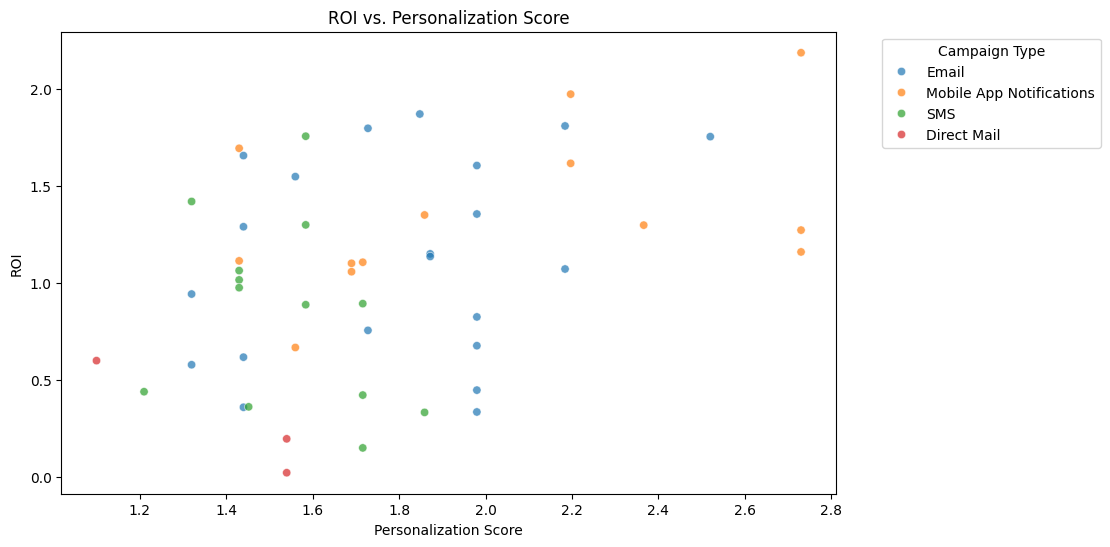

In [52]:
# Scatter plot of ROI vs. Personalization Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaigns, x="pers_score", y="ROI", hue="campaign_type", alpha=0.7)

# Add labels and title
plt.xlabel("Personalization Score")
plt.ylabel("ROI")
plt.title("ROI vs. Personalization Score")
plt.legend(title="Campaign Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [45]:
correlation_table = campaigns.groupby('campaign_type').apply(lambda group: group['ROI'].corr(group['pers_score']), include_groups=False).reset_index()

# Rename columns for clarity
correlation_table.columns = ['Campaign Type', 'Correlation (ROI vs. Pers. Score)']

# Display results
print(correlation_table)

              Campaign Type  Correlation (ROI vs. Pers. Score)
0               Direct Mail                          -0.955547
1                     Email                           0.270092
2  Mobile App Notifications                           0.426106
3                       SMS                          -0.280556


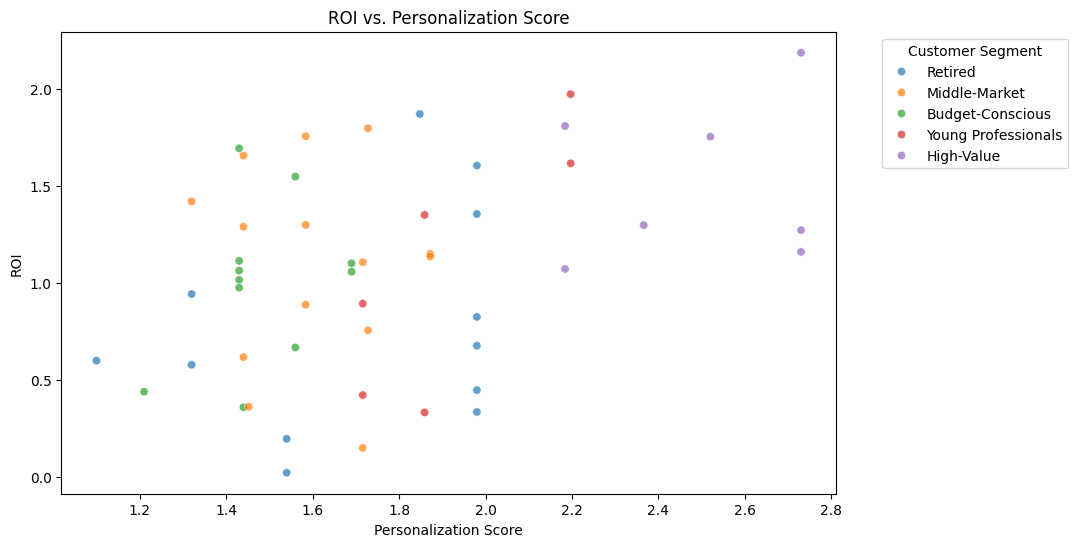

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaigns, x="pers_score", y="ROI", hue="customer_segment", alpha=0.7)

# Add labels and title
plt.xlabel("Personalization Score")
plt.ylabel("ROI")
plt.title("ROI vs. Personalization Score")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [46]:
correlation_table = campaigns.groupby('customer_segment').apply(lambda group: group['ROI'].corr(group['pers_score']), include_groups=False).reset_index()

# Rename columns for clarity
correlation_table.columns = ['Campaign Type', 'Correlation (ROI vs. Pers. Score)']

# Display results
print(correlation_table)

         Campaign Type  Correlation (ROI vs. Pers. Score)
0     Budget-Conscious                           0.331321
1           High-Value                           0.157156
2        Middle-Market                          -0.065635
3              Retired                           0.319681
4  Young Professionals                           0.817931


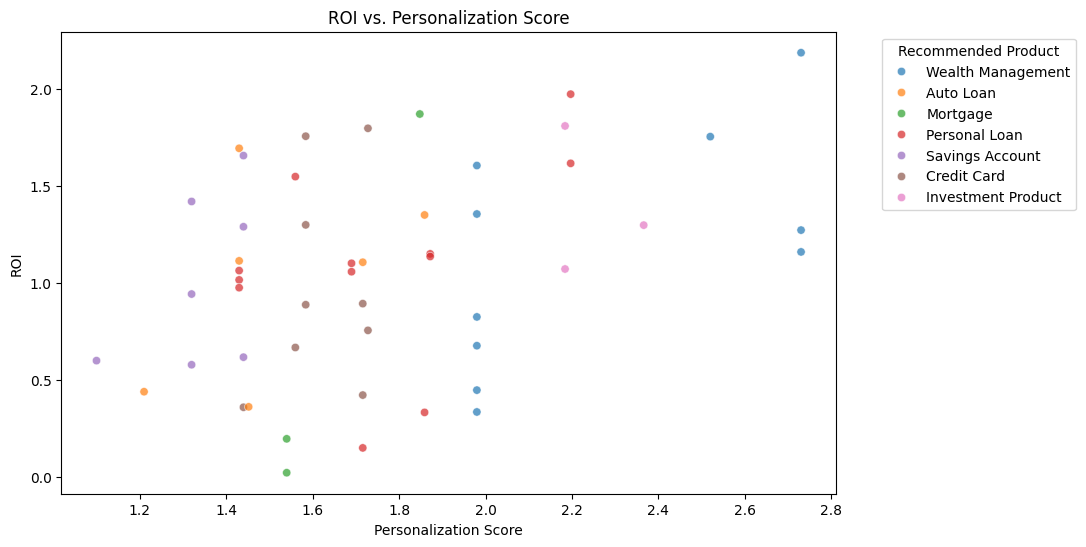

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaigns, x="pers_score", y="ROI", hue="recommended_product_name", alpha=0.7)

# Add labels and title
plt.xlabel("Personalization Score")
plt.ylabel("ROI")
plt.title("ROI vs. Personalization Score")
plt.legend(title="Recommended Product", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [47]:
correlation_table = campaigns.groupby('recommended_product_name').apply(lambda group: group['ROI'].corr(group['pers_score']), include_groups=False).reset_index()

# Rename columns for clarity
correlation_table.columns = ['Campaign Type', 'Correlation (ROI vs. Pers. Score)']

# Display results
print(correlation_table)

        Campaign Type  Correlation (ROI vs. Pers. Score)
0           Auto Loan                           0.471022
1         Credit Card                           0.226271
2  Investment Product                          -0.217873
3            Mortgage                           0.996331
4       Personal Loan                           0.389928
5     Savings Account                           0.475142
6   Wealth Management                           0.597864


# Predict ROI using Personalization Score

## Linear Regression

Mean Squared Error: 0.19
R-squared: 0.29


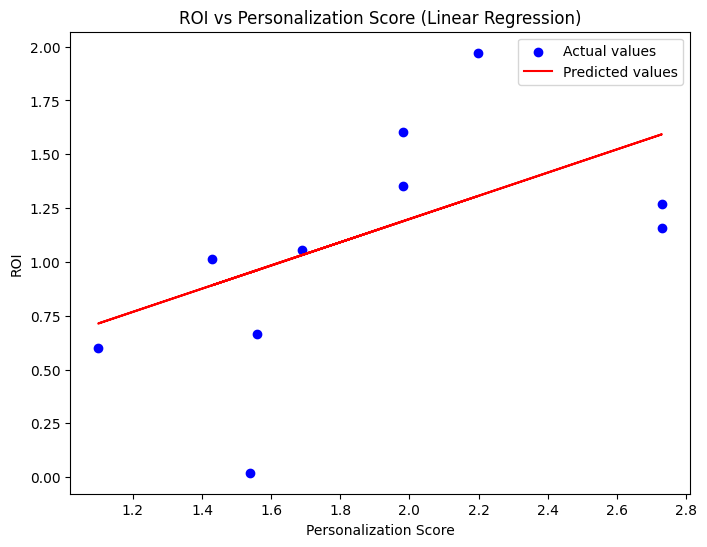

In [36]:
# Assuming you already have your 'campaigns' DataFrame loaded
# Preprocessing: Dropping rows with missing values in relevant columns
campaigns = campaigns.dropna(subset=['pers_score', 'ROI'])

# Features (X) and Target (y)
X = campaigns[['pers_score']]  # Features (independent variable)
y = campaigns['ROI']  # Target (dependent variable)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Personalization Score')
plt.ylabel('ROI')
plt.title('ROI vs Personalization Score (Linear Regression)')
plt.legend()
plt.show()


## Ridge Regression

Mean Squared Error (MSE): 0.1918
R-squared (R²): 0.2941


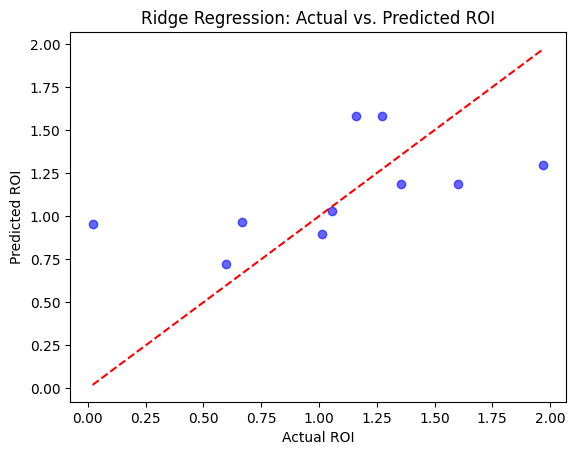

In [37]:
# Standardize the feature (Ridge benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1)  # You can tune alpha
ridge_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot Actual vs. Predicted ROI
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect line
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Ridge Regression: Actual vs. Predicted ROI")
plt.show()


## Baysian Ridge Regression

Mean Squared Error (MSE): 0.1940
R-squared (R²): 0.2858
Estimated Coefficients: [0.14989527]
Estimated Intercept: 1.0557116381305593


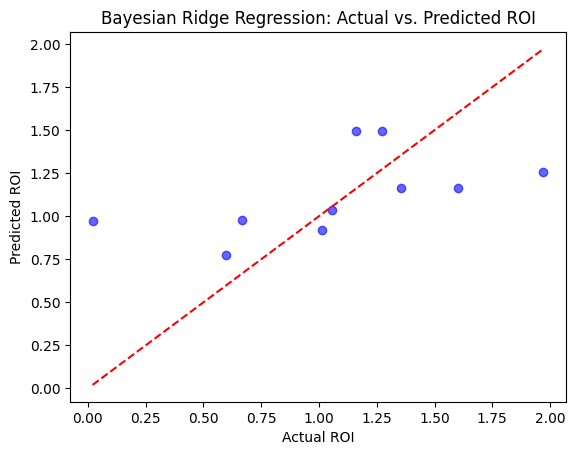

In [38]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = bayesian_ridge.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Estimated Coefficients: {bayesian_ridge.coef_}")
print(f"Estimated Intercept: {bayesian_ridge.intercept_}")

# Plot Actual vs. Predicted ROI
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect line
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Bayesian Ridge Regression: Actual vs. Predicted ROI")
plt.show()